In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Read Data into a DataFrame
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# print the shape of the DataFrame
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

C:\Users\alpes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

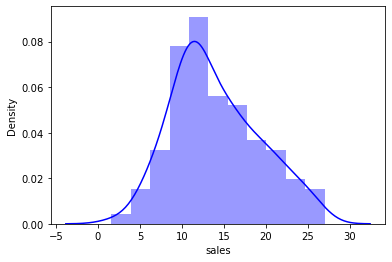

In [8]:
sns.distplot(df.sales,color='blue', hist=True,rug=False)

In [9]:
df['sales'].skew()

0.4075714250767127

Skewness is in range [-1,+1] that denotes it is normal distribution

<AxesSubplot:xlabel='TV', ylabel='sales'>

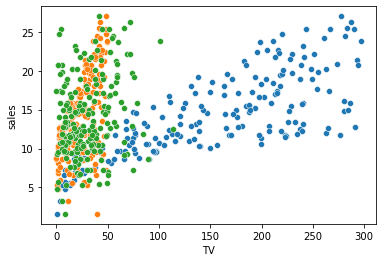

In [10]:
sns.scatterplot(x='TV', y='sales', data=df)
sns.scatterplot(x='radio', y='sales', data=df)
sns.scatterplot(x='newspaper', y='sales', data=df)

C:\Users\alpes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


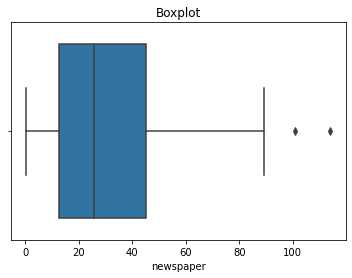

In [11]:
sns.boxplot(df.newspaper)
plt.title('Boxplot')
plt.show()

In [12]:
# Detection of outliers of RM(based on IQR)
Q3=df['newspaper'].quantile(0.75)
Q1=df['newspaper'].quantile(0.25)

IQR=Q3-Q1

lower_limit=Q1-(IQR*1.5)
upper_limit=Q3+(IQR*1.5)

lower_limit,upper_limit

(-35.775000000000006, 93.625)

In [13]:
# Methods to deal with outliers(3R technique)
#Remove(lets trimm the dataset)
df_trimmed=df[(df['newspaper'] > lower_limit) & (df['newspaper'] < upper_limit)]
df_trimmed

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


C:\Users\alpes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


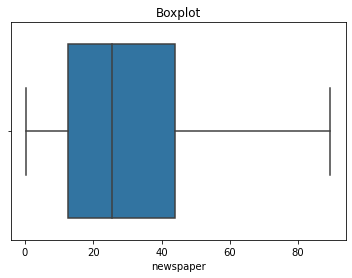

In [14]:
# lets explore outliers in the trimmed dataset
sns.boxplot(df_trimmed.newspaper)
plt.title('Boxplot')
plt.show()

In [15]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


{'newspaper': -2.1139312577842517} {'newspaper': 63.22193125778424}


C:\Users\alpes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


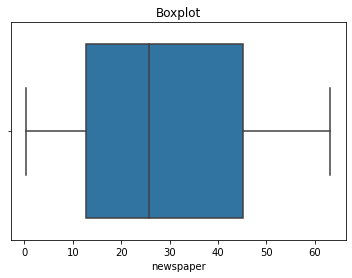

In [16]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='gaussian', tail='both', fold=1.5,variables=['newspaper'])
df_t=win.fit_transform(df[['newspaper']])

# we can inspect the minimum caps and maximum caps
print(win.left_tail_caps_,win.right_tail_caps_)

# lets see boxplot
sns.boxplot(df_t.newspaper)
plt.title('Boxplot')
plt.show()

In [17]:
from scipy import stats
stats.shapiro(df['sales'])

ShapiroResult(statistic=0.9760258793830872, pvalue=0.001682668924331665)

In [18]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [19]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df

,sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0
...,...,...
195,7.6,55.7
196,9.7,107.2
197,12.8,192.7
198,25.5,391.8


## EDA

#### On the basis of this data, how should you spend advertising moneyin the future? These general questions mightlead you to more specific questions:
- 1.Is there a relationship between ads and sales?
- 2.How strong is that relationship?
- 3.Given ad spending, can sales be predicted?

In [20]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14.022500,200.860500
std,5.217457,92.985181
min,1.600000,11.700000
25%,10.375000,123.550000
50%,12.900000,207.350000
75%,17.400000,281.125000
max,27.000000,433.600000


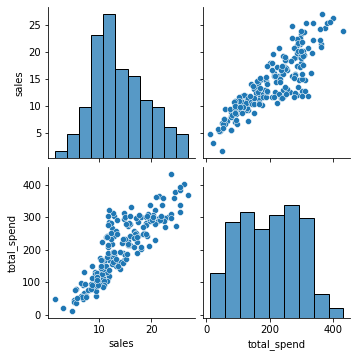

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [23]:
# create X and y
# taking only one variable for now

X = df[['total_spend']]
y = df['sales']

### Train | Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### Modelling
#### Creating a Model (Estimator)

In [25]:
# follow the usual sklearn pattern: import, instantiate,fit
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# print intercept and coefficients
model.intercept_, model.coef_

(4.199106500868725, array([0.04895385]))

In [27]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

### Plotting The Least Squares Line

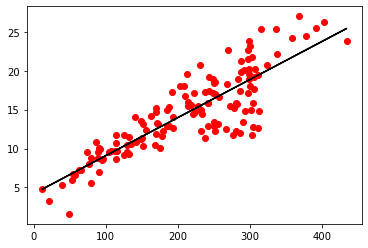

In [28]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,train_predictions,color='black')
plt.show()

### Evaluation Metrics

In [29]:
train_res = y_train - train_predictions
test_res = y_test - test_predictions

In [30]:
model.score(X_train,y_train) #R-squared value(train)

0.7404192834391545

In [31]:
model.score(X_test,y_test) #R-squared value(test)

0.7650262463310724

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predictions)

0.7650262463310724

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(model,X,y,cv=5)
scores

# Average of the MSE scores (we set back to positive)
abs(scores.mean())

0.743378317855542

In [35]:
# From sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.9143627368130542

In [37]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,test_predictions)
MSE

6.415866312543216

In [38]:
RMSE = np.sqrt(MSE)
RMSE

2.5329560423629967

### Diagonsis Test
Its also important to plot our residuals, this helps us understand if Linear Regression was a valid model choice.

**1. Linearity(Observed values VS Fitted values)**

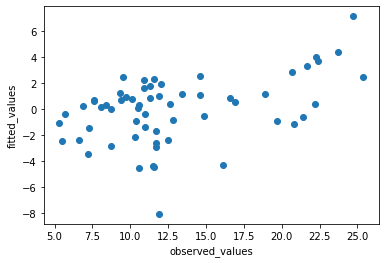

In [39]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2. Normality of Residuals**

It's also important to plot out residuals and check for normal distribution

C:\Users\alpes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

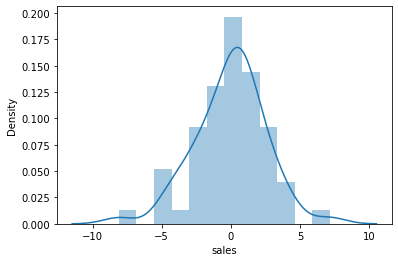

In [40]:
sns.distplot(test_res,kde=True)

# plt.hist(test_res)
# plt.show()

**3. Homoscadesicity(y_hat vs residuals)**

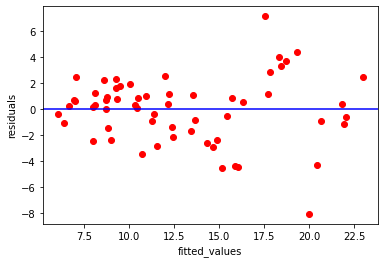

In [41]:
# Homoscadesicity (Residuals vs Fitted values)
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [42]:
spend=200
predicted_sales = 4.199 + 0.04895*spend
predicted_sales

13.989

In [43]:
X_new = pd.DataFrame({'total_spend': [200]})
X_new

,total_spend
0,200


In [44]:
# use the model to make oredictions on a new value
model.predict(X_new)

array([13.98987609])

### Confidence in the Model
**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** It's a high bias/low variance model. Under repeated sampling, the line will stay roughly in the same place(low variance,but the average of those models wont do a great job capturing the true relationship(high bias). Note that low variance is a useful characteristic when you dont have a lot of training data.

A closely realted concept is **confidence intervals**. Statsmodels calculate 95% confidence intervals foryour model coefficients, which are interpreted as follows: If the populationfrom which this sample was drwan was**sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [45]:
# importing required libraries
import statsmodels.formula.api as smf

#model
model1=smf.ols("y~X",data=df).fit()

#P-values for the variables and R-squared value for prepared model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.06e-62
Time:                        17:39:29   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.000       3.378       5.108
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hypothesis Testing and p-values
Closely related to confidence intervals is hypothesis testing. Generally speaking, you start with the null hypothesis and an alternative hypothesis (that is opposite the null).Then,you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.
- null hypothesis: There is no relationship between totalspend and Sales (and thus B1 equals zero)
- alternate hypothesis: There is a relationship between totalspend and Sales (and thus B1 is not equal tozero)

### Retraining MOdel on Full Data

In [46]:
final_model = LinearRegression()

final_model.fit(X,y)

final_model.coef_

array([0.04868788])

### Prediction on New Data
**Our next ad campaign will have a total spend of 200k on ads, how many units could we expect to sell as a result of this?**

In [47]:
final_model.predict([[200]])

array([13.98060408])

### Deployment
### Model Persistence (Saving and Loading a Model)

In [48]:
from joblib import dump

In [49]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [50]:
from joblib import load

In [51]:
loaded_model = load('sales_model.joblib')

In [52]:
loaded_model.intercept_

4.243028216036331

In [53]:
loaded_model.coef_

array([0.04868788])

In [54]:
loaded_model.predict([[200]])

array([13.98060408])